# Lab 8: Linear Classifiers

In [106]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from plotnine import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, cohen_kappa_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [77]:
weed = pd.read_csv("/Users/alexandra/Desktop/GSB-544/Labs/Lab8/cannabis_full.csv")
weed.dropna(inplace=True)
weed.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part One: Binary Classification

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

1. Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

2. Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

3. Report the (cross-validated!) metric.

4. Fit the final model.

5. Output a confusion matrix.

For these models:
Q1: LDA
Q2: QDA
Q3: SVC
Q4: SVM


## Q1: LDA

In [78]:
#filter weed by type
weed_type = weed[weed["Type"].isin(["sativa", "indica"])]
weed_type.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# encode to have type as numeric values
le = LabelEncoder()
weed_type["Type_encoded"] = le.fit_transform(weed_type["Type"])

In [80]:
# define variables
X = weed_type.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = weed_type["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

#  create pipeline 
preprocessor = Pipeline([
    ("scaler", StandardScaler())
])

In [81]:

# function for evaluating all  models
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])
    # grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    predictions = best_model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions, target_names= le.classes_)
    return grid_search.best_params_, grid_search.best_score_, conf_matrix, report


In [82]:
# LDA model
lda_model = LinearDiscriminantAnalysis()
lda_param_grid = {}
lda_results = evaluate_model(lda_model, lda_param_grid, X_train, y_train, X_test, y_test)

#chatgpt helped
print("LDA Results")
print("Best Parameters:", lda_results[0])
print("Cross-validated accuracy:", lda_results[1])
print("Confusion Matrix:\n", lda_results[2])
print("Classification Report:\n", lda_results[3])


Python(75285) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75286) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75287) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75288) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75289) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75290) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75291) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Python(75292) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


LDA Results
Best Parameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214

LDA Results
Best Parameters: {}
Cross-validated accuracy: 0.8548469212246301
Confusion Matrix:
 [[125   7]
 [ 23  59]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.84      0.95      0.89       132
      sativa       0.89      0.72      0.80        82

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214



## Q2. QDA

In [83]:
import os
import warnings

os.environ["MallocStackLogging"] = "0"
warnings.filterwarnings("ignore")

In [90]:
# QDA Model
qda_model = QuadraticDiscriminantAnalysis()
qda_param_grid = {"classifier__reg_param" :[0,.1,.25,.5,.75,1]}  
qda_results = evaluate_model(qda_model, qda_param_grid, X_train, y_train, X_test, y_test)

print("QDA Results")
print("Best Parameters:", qda_results[0])
print("Cross-validated accuracy:", qda_results[1])
print("Confusion Matrix:\n", qda_results[2])
print("Classification Report:\n", qda_results[3])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/F

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/F

QDA Results
Best Parameters: {'classifier__reg_param': 1}
Cross-validated accuracy: 0.6256068376068376
Confusion Matrix:
 [[145  42  39]
 [ 49  87   2]
 [ 29   4  42]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.65      0.64      0.65       226
      indica       0.65      0.63      0.64       138
      sativa       0.51      0.56      0.53        75

    accuracy                           0.62       439
   macro avg       0.60      0.61      0.61       439
weighted avg       0.63      0.62      0.63       439

QDA Results
Best Parameters: {'classifier__reg_param': 1}
Cross-validated accuracy: 0.6256068376068376
Confusion Matrix:
 [[145  42  39]
 [ 49  87   2]
 [ 29   4  42]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.65      0.64      0.65       226
      indica       0.65      0.63      0.64       138
      sativa       0.51      0.56      0.53        75

    accuracy     

## Q3: SVC

In [85]:
# SVC Model
svc_model = SVC(kernel='poly')  # Limiting to polynomial kernel

svc_param_grid = {
    "classifier__C": [0.1, 1, 10, 100], #CHATGPT HELPED
    "classifier__degree": [2, 3, 4],  # Degree of the polynomial kernel
}

# Evaluate model using the evaluate_model function
svc_results = evaluate_model(svc_model, svc_param_grid, X_train, y_train, X_test, y_test)

# Print results
print("SVC Results")
print("Best Parameters:", svc_results[0])
print("Cross-validated accuracy:", svc_results[1])
print("Confusion Matrix:\n", svc_results[2])
print("Classification Report:\n", svc_results[3])

SVC Results
Best Parameters: {'classifier__C': 100, 'classifier__degree': 3}
Cross-validated accuracy: 0.8360784313725489
Confusion Matrix:
 [[116  16]
 [ 27  55]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.81      0.88      0.84       132
      sativa       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80      0.80      0.80       214

SVC Results
Best Parameters: {'classifier__C': 100, 'classifier__degree': 3}
Cross-validated accuracy: 0.8360784313725489
Confusion Matrix:
 [[116  16]
 [ 27  55]]
Classification Report:
               precision    recall  f1-score   support

      indica       0.81      0.88      0.84       132
      sativa       0.77      0.67      0.72        82

    accuracy                           0.80       214
   macro avg       0.79      0.77      0.78       214
weighted avg       0.80  

## Q4: SVM

In [105]:

# SVM Model (using SVC)
svm_model = SVC(kernel='poly')  # Polynomial kernel

# Define parameter grid
svm_param_grid = {
    "classifier__C": [0.1, 1, 10, 100],  
    "classifier__degree": [2, 3, 4], 
}

# Evaluate model using the evaluate_model function
svm_results = evaluate_model(svm_model, svm_param_grid, X_train, y_train, X_test, y_test)

# Print results
print("SVM Results")
print("Best Parameters:", svm_results[0])
print("Cross-validated accuracy:", svm_results[1])
print("Confusion Matrix:\n", svm_results[2])
print("Classification Report:\n", svm_results[3])


SVM Results
Best Parameters: {'classifier__C': 10, 'classifier__degree': 3}
Cross-validated accuracy: 0.5788001628001627
Confusion Matrix:
 [[164  35  27]
 [ 60  74   4]
 [ 49   5  21]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.60      0.73      0.66       226
      indica       0.65      0.54      0.59       138
      sativa       0.40      0.28      0.33        75

    accuracy                           0.59       439
   macro avg       0.55      0.51      0.53       439
weighted avg       0.58      0.59      0.58       439

SVM Results
Best Parameters: {'classifier__C': 10, 'classifier__degree': 3}
Cross-validated accuracy: 0.5788001628001627
Confusion Matrix:
 [[164  35  27]
 [ 60  74   4]
 [ 49   5  21]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.60      0.73      0.66       226
      indica       0.65      0.54      0.59       138
      sativa       0.40      0.28   

# Part 2: Natural Multiclass

Now use the full dataset, including the Hybrid strains.

## Q1: Fit a decision tree, plot the final fit, and interpret the results.

In [87]:
# encode weed dataset
le = LabelEncoder()
weed["Type_encoded"] = le.fit_transform(weed["Type"])
# define variables
X = weed.drop(columns=["Strain", "Type", "Type_encoded", "Effects", "Flavor"])
y = weed["Type_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [91]:
#decsion tree

dt_pipeline = Pipeline([("dt", DecisionTreeClassifier(random_state=42))])
param_grid_dt = {"dt__max_depth": [3, 5, 10, None], "dt__min_samples_split": [2, 5, 10]}
dt_grid = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring="accuracy")
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Cross-validated Accuracy:", dt_grid.best_score_)
dt_cm = confusion_matrix(y_test, best_dt.predict(X_test), labels=best_dt.named_steps["dt"].classes_)

Best Decision Tree Parameters: {'dt__max_depth': 3, 'dt__min_samples_split': 2}
Cross-validated Accuracy: 0.6273080993080994
Best Decision Tree Parameters: {'dt__max_depth': 3, 'dt__min_samples_split': 2}
Cross-validated Accuracy: 0.6273080993080994


Accuracy: 0.6104783599088838
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66       226
           1       0.60      0.54      0.57       138
           2       0.58      0.48      0.53        75

    accuracy                           0.61       439
   macro avg       0.60      0.57      0.58       439
weighted avg       0.61      0.61      0.61       439

Accuracy: 0.6104783599088838
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.69      0.66       226
           1       0.60      0.54      0.57       138
           2       0.58      0.48      0.53        75

    accuracy                           0.61       439
   macro avg       0.60      0.57      0.58       439
weighted avg       0.61      0.61      0.61       439



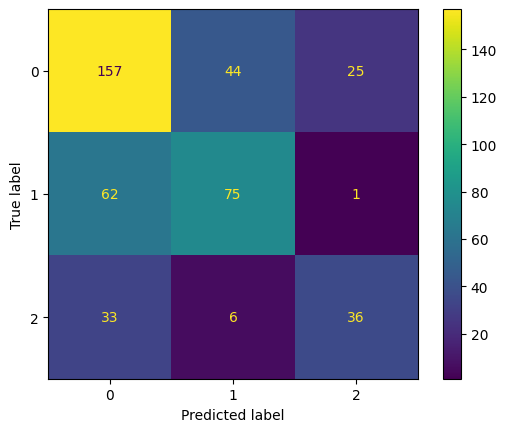

In [103]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=3,min_samples_split = 2) 
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print("Classification Report:\n", classification_report(y_test, y_pred))

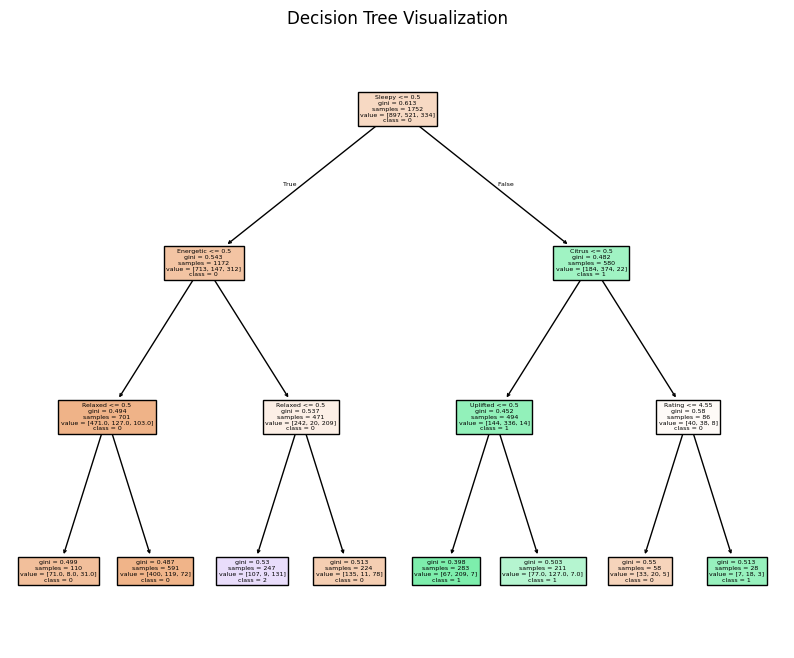

In [94]:
tree_model = best_dt.named_steps["dt"]  

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(
    tree_model,
    feature_names=X.columns,  
    class_names=[str(cls) for cls in tree_model.classes_], 
    filled=True
)
plt.title("Decision Tree Visualization")
plt.show()

## Q2: Repeat the analyses from Part One for LDA, QDA, and KNN.

### LDA 

LDA Accuracy: 0.5808656036446469
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62       226
           1       0.61      0.61      0.61       138
           2       0.42      0.41      0.42        75

    accuracy                           0.58       439
   macro avg       0.55      0.55      0.55       439
weighted avg       0.58      0.58      0.58       439

LDA Accuracy: 0.5808656036446469
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.62      0.62       226
           1       0.61      0.61      0.61       138
           2       0.42      0.41      0.42        75

    accuracy                           0.58       439
   macro avg       0.55      0.55      0.55       439
weighted avg       0.58      0.58      0.58       439



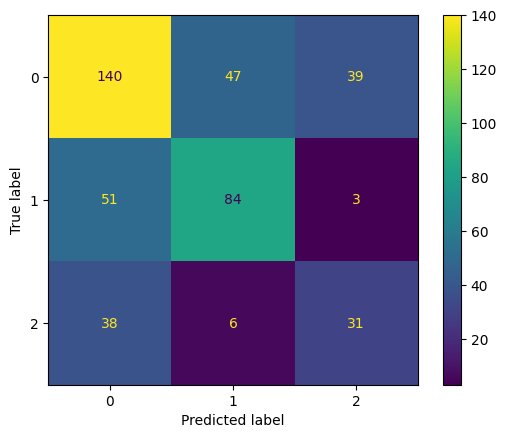

In [107]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_lda = lda_model.predict(X_test)
print("LDA Accuracy:", accuracy_score(y_test, y_pred_lda))

# cm
cm_lda = confusion_matrix(y_test, y_pred_lda)
ConfusionMatrixDisplay(cm_lda).plot()

# classification report
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))


### QDA

QDA Accuracy: 0.19817767653758542
QDA Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.05      0.10       226
           1       0.33      0.03      0.05       138
           2       0.17      0.95      0.30        75

    accuracy                           0.20       439
   macro avg       0.36      0.34      0.15       439
weighted avg       0.43      0.20      0.12       439

QDA Accuracy: 0.19817767653758542
QDA Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.05      0.10       226
           1       0.33      0.03      0.05       138
           2       0.17      0.95      0.30        75

    accuracy                           0.20       439
   macro avg       0.36      0.34      0.15       439
weighted avg       0.43      0.20      0.12       439



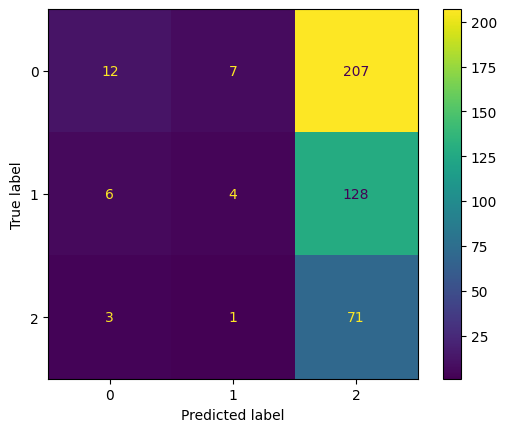

In [111]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# preds
y_pred_qda = qda_model.predict(X_test)
print("QDA Accuracy:", accuracy_score(y_test, y_pred_qda))

# cm
cm_qda = confusion_matrix(y_test, y_pred_qda)
ConfusionMatrixDisplay(cm_qda).plot()

# Classification report
print("QDA Classification Report:\n", classification_report(y_test, y_pred_qda))


### KNN

Best KNN Parameters: {'knn__n_neighbors': 10}
Cross-validated Accuracy (KNN): 0.587933251933252
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65       226
           1       0.65      0.51      0.57       138
           2       0.47      0.29      0.36        75

    accuracy                           0.59       439
   macro avg       0.57      0.51      0.53       439
weighted avg       0.59      0.59      0.58       439

Best KNN Parameters: {'knn__n_neighbors': 10}
Cross-validated Accuracy (KNN): 0.587933251933252
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.73      0.65       226
           1       0.65      0.51      0.57       138
           2       0.47      0.29      0.36        75

    accuracy                           0.59       439
   macro avg       0.57      0.51      0.53       439
weighted avg       0.59      0.59      0.58  

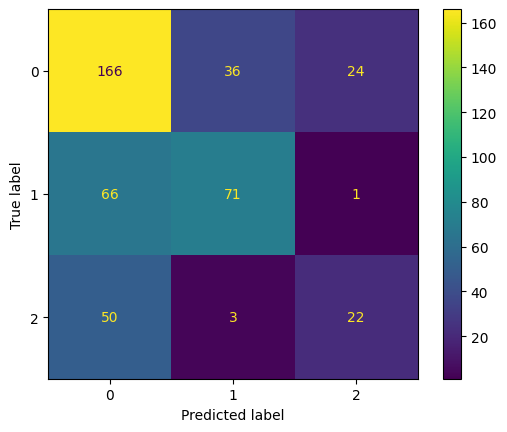

In [118]:
knn_pipeline = Pipeline([("knn", KNeighborsClassifier())])

knn_param_grid = {
    "knn__n_neighbors": [3, 5, 7, 10]  
}

knn_grid = GridSearchCV(knn_pipeline, knn_param_grid, cv=5, scoring="accuracy")
knn_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
print("Best KNN Parameters:", knn_grid.best_params_)
print("Cross-validated Accuracy (KNN):", knn_grid.best_score_)

y_pred_knn = best_knn.predict(X_test)


knn_cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(knn_cm).plot()
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


## Q3: Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

My metrics are worse than in part 1.  Adding in the hybrid strain made it much harder for the models to predict. The accuracy was worse. 

## Part 3: Multiclass from Binary: Consider two models designed for binary classification: SVC and Logistic Regression.

### Q1

Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

Indica vs. Not Indica

Sativa vs. Not Sativa

Hybrid vs. Not Hybrid

In [ ]:
classes = ["Indica", "Sativa", "Hybrid"]  # Replace with actual class names
models = {}  # To store results

# Iterate through each class
for target_class in classes:
    print(f"\n### {target_class} vs. Not {target_class} ###")
    
    # Create binary labels
    y_binary = create_binary_labels(y, target_class)
    
    # Split the dataset
    X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
    )
    
    # Train Decision Tree Classifier
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=2)
    dt_model.fit(X_train_bin, y_train_bin)
    
    # Predictions
    y_pred_bin = dt_model.predict(X_test_bin)
    
    # Metrics
    accuracy = accuracy_score(y_test_bin, y_pred_bin)
    report = classification_report(y_test_bin, y_pred_bin, target_names=[f"Not {target_class}", target_class])
    cm = confusion_matrix(y_test_bin, y_pred_bin)
    
    # Store results
    models[target_class] = {
        "model": dt_model,
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": cm,
    }
    
    # Display Results
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    ConfusionMatrixDisplay(cm, display_labels=[f"Not {target_class}", target_class]).plot()
    plt.title(f"Confusion Matrix: {target_class} vs. Not {target_class}")
    plt.show()


In [119]:
weed['Indica_or_Not'] = weed['Type'].apply(lambda x: 1 if x == 'Indica' else 0)

In [121]:
weed['stavia_or_not'] = weed['Type'].apply(lambda x: 1 if x == 'stativa' else 0)

In [122]:
weed['hybrid_or_not'] = weed['Type'].apply(lambda x: 1 if x == 'hybrid' else 0)

In [ ]:
#logistic

## Logistic Regression
# Define categories for OvR (One-vs-Rest)
categories = label_encoder.classes_

# Loop through each category and create OvR models
for category in categories:
    # Create binary target for this category: 1 if the category, 0 otherwise
    y_train_ovr = (y_train == label_encoder.transform([category])[0]).astype(int)
    y_test_ovr = (y_test == label_encoder.transform([category])[0]).astype(int)

    # Ensure that both classes (0 and 1) are present in the training data
    if len(set(y_train_ovr)) > 1:  # Check if both 0 and 1 are in the training data
        # Logistic Regression OvR Model
        logreg_pipeline = Pipeline([("logreg", LogisticRegression(random_state=42))])
        logreg_pipeline.fit(X_train, y_train_ovr)
        y_pred_logreg = logreg_pipeline.predict(X_test)

        # Print the classification report for this category
        print(f"Classification Report for {category} vs. Not {category} (OvR):")
        print(classification_report(y_test_ovr, y_pred_logreg))


### Q2: Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

### Q3: Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

### Indica vs. Sativa

### Indica vs. Hybrid

### Hybrid vs. Sativa

### Q4: Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

### Q5
### Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

### What about for SVC?